**Business Context:**

Analytics driving every industry based on a variety of technology platforms which collect information
from various sources by analysing what customers certainly want. The Credit Card industry is also
data rich industry and data can be leveraged in infinite ways to understand customer behaviour.
The data from a credit card processor shows the consumer types and their business spending
behaviours. Therefore, companies can develop the marketing campaigns that directly address
consumers’ behaviour. In return, this helps to make better sales and the revenue undoubtedly grows
greater sales.
Understanding the consumption pattern for credit cards at an individual consumer level is important
for customer relationship management. This understanding allows banks to customize for
consumers and make strategic marketing plans. Thus it is imperative to study the relationship
between the characteristics of the consumers and their consumption patterns.

**Business Objectives:**

One of the leading banks provided below data
a. Customer Demographics
b. Customer Behavioural data (information on liabilities, assets and history of transactions with
the bank for each customer). Data has been provided for a particular set of customers' credit
card spend in the previous 3 months (April, May & June) and their expected average spend
in the coming 3 months (July, August & September)
c. Credit consumption

In [55]:
#importing files
import pandas as pd
import numpy as np

In [56]:
#reading files
d1=pd.read_excel('/content/drive/MyDrive/Datesets/1_credit_card/CreditConsumptionData.xlsx')
d2=pd.read_excel('/content/drive/MyDrive/Datesets/1_credit_card/CustomerBehaviorData.xlsx')
d3=pd.read_excel('/content/drive/MyDrive/Datesets/1_credit_card/CustomerDemographics.xlsx')

In [57]:
d2=d2.dropna()

In [58]:
d3=d3.dropna()

In [59]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19993 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     19993 non-null  int64  
 1   cc_cons_apr            19993 non-null  float64
 2   dc_cons_apr            19993 non-null  float64
 3   cc_cons_may            19993 non-null  float64
 4   dc_cons_may            19993 non-null  float64
 5   cc_cons_jun            19993 non-null  float64
 6   dc_cons_jun            19993 non-null  float64
 7   cc_count_apr           19993 non-null  float64
 8   cc_count_may           19993 non-null  int64  
 9   cc_count_jun           19993 non-null  int64  
 10  dc_count_apr           19993 non-null  int64  
 11  dc_count_may           19993 non-null  int64  
 12  dc_count_jun           19993 non-null  int64  
 13  card_lim               19993 non-null  int64  
 14  personal_loan_active   19993 non-null  int64  
 15  ve

##outlier treatment

In [60]:

def outlier_treat(x):
  if ((x.dtype=='int64') | (x.dtype=='float64')):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
  return x
d2=d2.apply(outlier_treat)

In [61]:
def outlier_treat(x):
  if ((x.dtype=='int64') | (x.dtype=='float64')):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
  return x
d3=d3.apply(outlier_treat)

## JOIN

In [62]:
d5=pd.merge(d1,d2,on='ID',how='inner')
data=pd.merge(d5,d3,on='ID',how='inner')

<ipython-input-62-2e21e9075ed6>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  d5=pd.merge(d1,d2,on='ID',how='inner')
<ipython-input-62-2e21e9075ed6>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  data=pd.merge(d5,d3,on='ID',how='inner')


In [63]:
#these are constant features so doesn't provide any useful information for the machine learning model
columns_to_drop=['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']

In [64]:
data=data.drop(columns=columns_to_drop)

In [65]:
data.shape

(19588, 43)

In [68]:
#this is also constant feature
data=data.drop(columns=['Emp_Tenure_Years'])

Converting categorical features into numerical


In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Income'] = le.fit_transform(data['Income'])
data['account_type'] = le.fit_transform(data['account_type'])

In [70]:
cat_vars=data.select_dtypes('O').columns

In [71]:
cat_vars

Index(['gender'], dtype='object')

In [72]:
data=pd.get_dummies(columns=cat_vars,data=data,drop_first=True)

In [73]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19588 entries, 0 to 19587
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons                       14707 non-null  float64
 1   cc_cons_apr                   19588 non-null  float64
 2   dc_cons_apr                   19588 non-null  float64
 3   cc_cons_may                   19588 non-null  float64
 4   dc_cons_may                   19588 non-null  float64
 5   cc_cons_jun                   19588 non-null  float64
 6   dc_cons_jun                   19588 non-null  float64
 7   cc_count_apr                  19588 non-null  float64
 8   cc_count_may                  19588 non-null  int64  
 9   cc_count_jun                  19588 non-null  int64  
 10  dc_count_apr                  19588 non-null  int64  
 11  dc_count_may                  19588 non-null  int64  
 12  dc_count_jun                  19588 non-null  int64  
 13  c

In [74]:
data2=data

In [75]:
len(data2.columns)

42

In [76]:
#feature engineering

In [77]:
data2["investment"]= data2[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1)

In [78]:
data2['cc_cons_old'] = data2[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
data2['dc_cons'] = data2[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
data2['cc_count'] = data2[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
data2['dc_count'] = data2[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
data2['debit_amount'] = data2[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
data2['credit_amount'] = data2[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
data2['max_credit_amount'] = data2[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
data2['debit_count'] = data2[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
data2['credit_count'] = data2[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)

In [79]:
cols_to_delete_1 = ['investment_1','investment_2','investment_3','investment_4','cc_cons_apr', 'cc_cons_may','cc_cons_jun',
                    'dc_cons_apr', 'dc_cons_may','dc_cons_jun','cc_count_apr', 'cc_count_may','cc_count_jun',
                    'dc_count_apr', 'dc_count_may','dc_count_jun','debit_amount_apr', 'debit_amount_may','debit_amount_jun',
                    'credit_amount_apr', 'credit_amount_may','credit_amount_jun',
                    'max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun','debit_count_apr',
                    'debit_count_may','debit_count_jun','credit_count_apr', 'credit_count_may','credit_count_jun']

In [80]:
data2.drop(cols_to_delete_1, axis = 1, inplace = True)

In [81]:
data2

,cc_cons,card_lim,emi_active,account_type,age,Income,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,investment,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,20014.0,430000,1674.09,0,35,2,1,708.0,0,17.0,...,9509.34,17157.466667,13824.666667,12.666667,36.333333,42499.433333,76576.710000,33565.000000,43.000000,3.333333
1,10173.0,127500,13043.34,0,35,0,6,233.0,0,14.0,...,478260.71,14610.206667,712.666667,7.000000,18.333333,48883.790000,78687.123333,42641.333333,58.666667,19.666667
2,16095.0,199999,25375.27,0,55,2,1,802.0,1,3.0,...,665166.57,10533.206667,3941.703333,59.000000,28.333333,37303.083333,77047.000000,25418.000000,51.666667,6.000000
3,7707.0,155000,3544.33,0,29,2,6,867.0,1,4.0,...,349073.05,20206.793333,8008.146667,34.666667,4.000000,41759.216667,122689.280000,36125.333333,54.666667,24.666667
4,130263.0,150000,5026.50,0,27,2,3,958.0,1,11.0,...,298092.90,11331.408333,1090.463333,24.000000,13.333333,40422.803333,84657.500000,19052.333333,16.000000,15.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,NaN,296000,421.64,0,60,2,5,968.0,0,9.0,...,139489.00,6164.533333,1237.380000,4.000000,10.000000,74297.156667,44607.333333,54965.000000,9.666667,55.333333
19584,NaN,595000,7870.88,0,35,2,1,523.0,0,7.0,...,1047420.90,17464.370000,4091.193333,10.333333,9.666667,60585.396667,69526.080000,39602.000000,22.333333,23.333333
19585,NaN,16000,3668.30,0,53,2,7,723.0,1,2.0,...,2218185.90,9749.816667,3228.033333,47.666667,25.666667,31530.106667,57862.000000,20290.666667,26.000000,31.000000
19586,NaN,124000,5450.34,0,62,0,8,863.0,1,16.0,...,237016.03,4909.131667,5352.680000,30.000000,6.666667,96173.826667,76552.286667,17389.333333,52.666667,8.666667


In [82]:
data2.head()

,cc_cons,card_lim,emi_active,account_type,age,Income,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,investment,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,20014.0,430000,1674.09,0,35,2,1,708.0,0,17.0,...,9509.34,17157.466667,13824.666667,12.666667,36.333333,42499.433333,76576.710000,33565.000000,43.000000,3.333333
1,10173.0,127500,13043.34,0,35,0,6,233.0,0,14.0,...,478260.71,14610.206667,712.666667,7.000000,18.333333,48883.790000,78687.123333,42641.333333,58.666667,19.666667
2,16095.0,199999,25375.27,0,55,2,1,802.0,1,3.0,...,665166.57,10533.206667,3941.703333,59.000000,28.333333,37303.083333,77047.000000,25418.000000,51.666667,6.000000
3,7707.0,155000,3544.33,0,29,2,6,867.0,1,4.0,...,349073.05,20206.793333,8008.146667,34.666667,4.000000,41759.216667,122689.280000,36125.333333,54.666667,24.666667
4,130263.0,150000,5026.50,0,27,2,3,958.0,1,11.0,...,298092.90,11331.408333,1090.463333,24.000000,13.333333,40422.803333,84657.500000,19052.333333,16.000000,15.666667


Correlation check

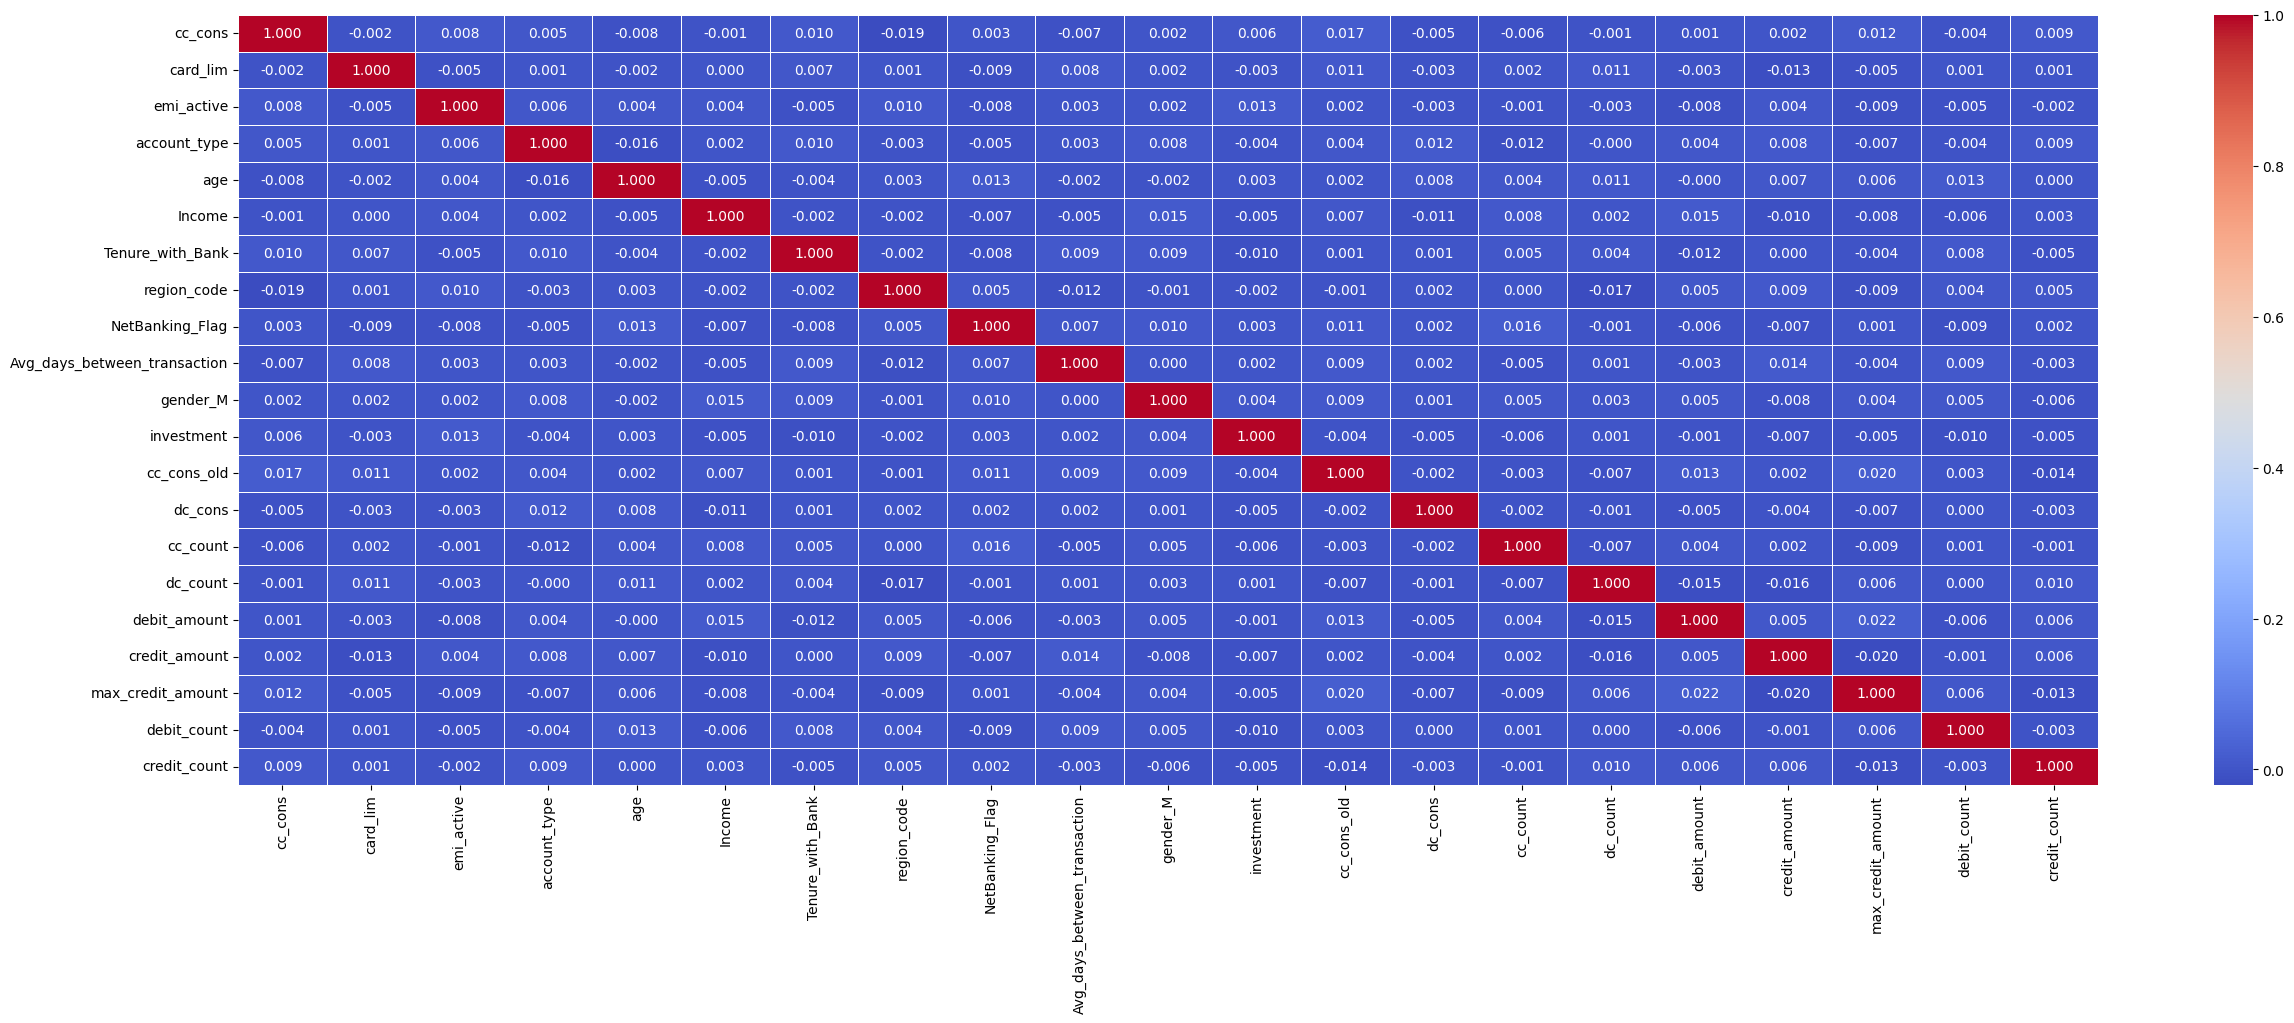

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data2.corr()
plt.figure(figsize=(30, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.show()

In [84]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19588 entries, 0 to 19587
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons                       14707 non-null  float64
 1   card_lim                      19588 non-null  int64  
 2   emi_active                    19588 non-null  float64
 3   account_type                  19588 non-null  int64  
 4   age                           19588 non-null  int64  
 5   Income                        19588 non-null  int64  
 6   Tenure_with_Bank              19588 non-null  int64  
 7   region_code                   19588 non-null  float64
 8   NetBanking_Flag               19588 non-null  int64  
 9   Avg_days_between_transaction  19588 non-null  float64
 10  gender_M                      19588 non-null  uint8  
 11  investment                    19588 non-null  float64
 12  cc_cons_old                   19588 non-null  float64
 13  d

In [85]:
data.columns

Index(['cc_cons', 'card_lim', 'emi_active', 'account_type', 'age', 'Income',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'gender_M', 'investment', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count'],
      dtype='object')

###Univariate Analysis

Axes(0.125,0.11;0.775x0.77)


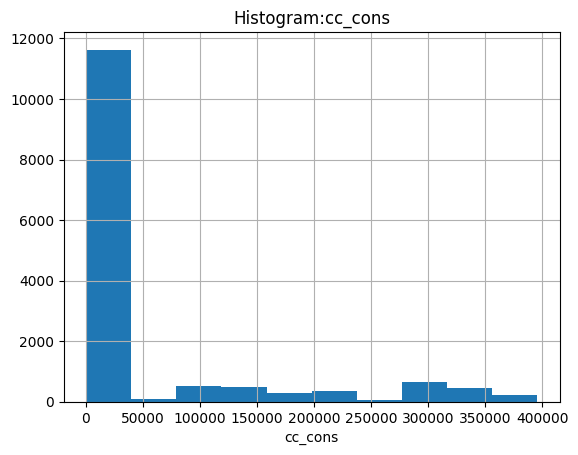

Axes(0.125,0.11;0.775x0.77)


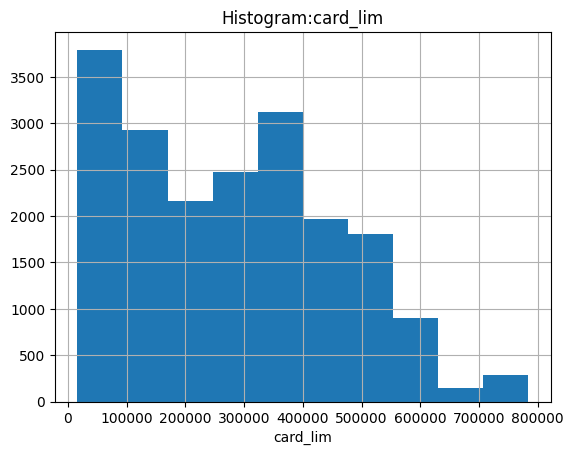

Axes(0.125,0.11;0.775x0.77)


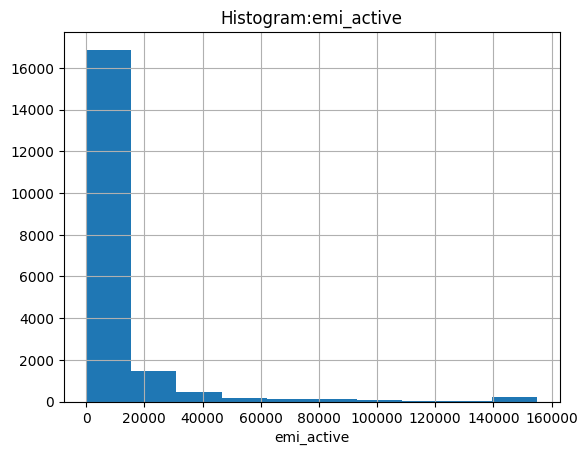

Axes(0.125,0.11;0.775x0.77)


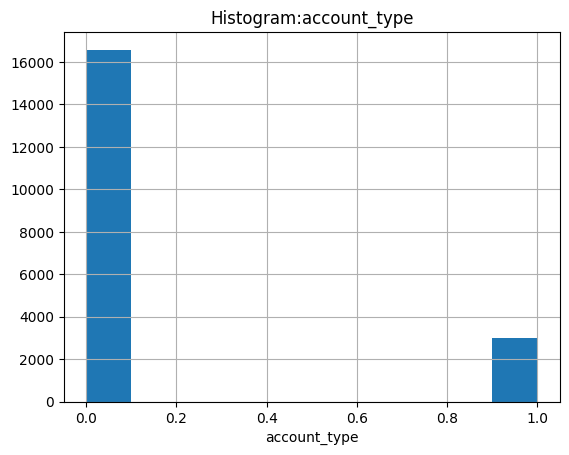

Axes(0.125,0.11;0.775x0.77)


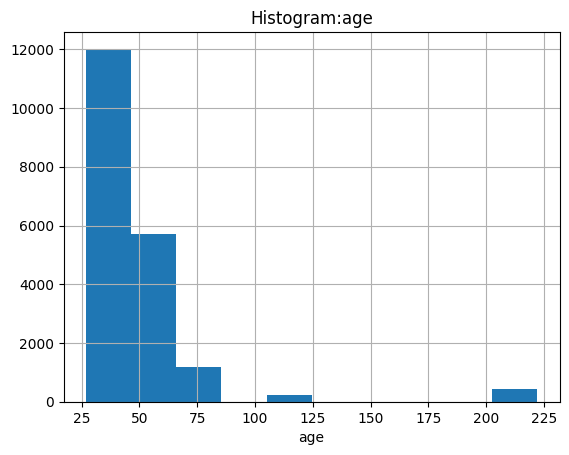

Axes(0.125,0.11;0.775x0.77)


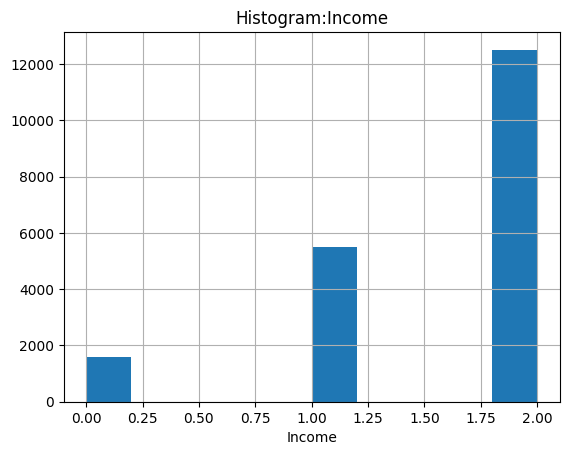

Axes(0.125,0.11;0.775x0.77)


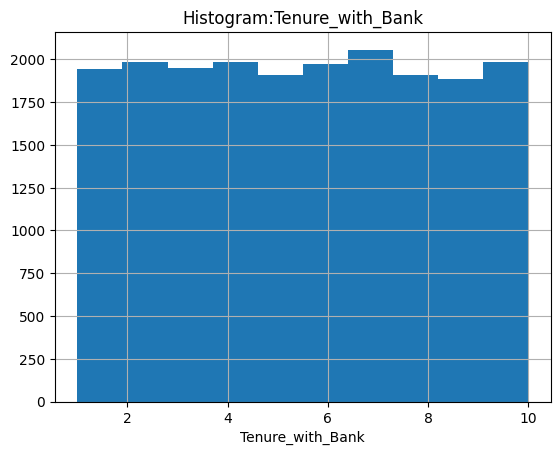

Axes(0.125,0.11;0.775x0.77)


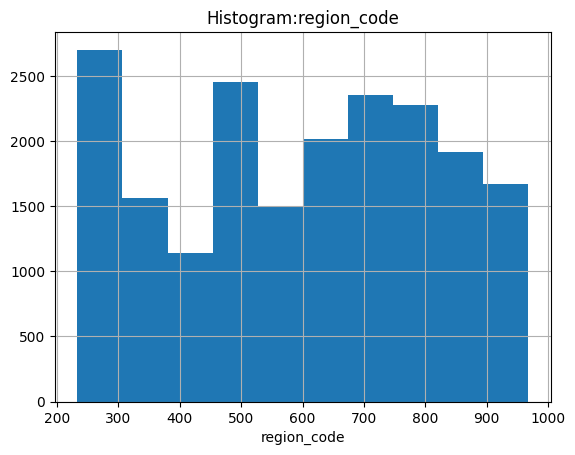

Axes(0.125,0.11;0.775x0.77)


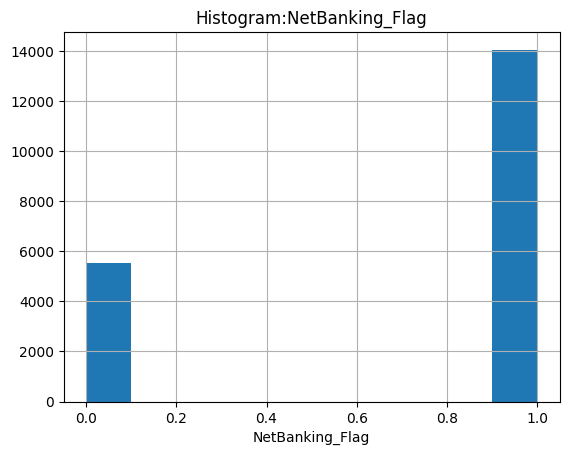

Axes(0.125,0.11;0.775x0.77)


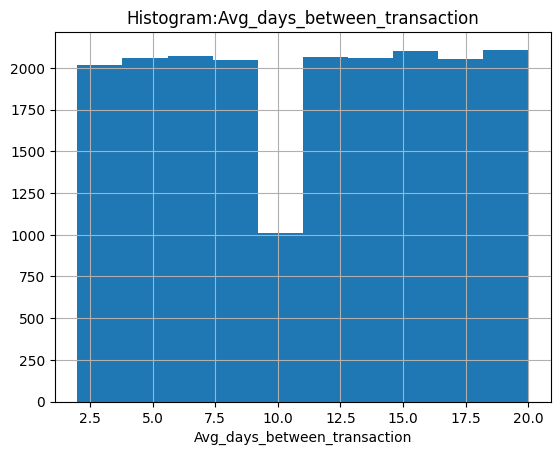

Axes(0.125,0.11;0.775x0.77)


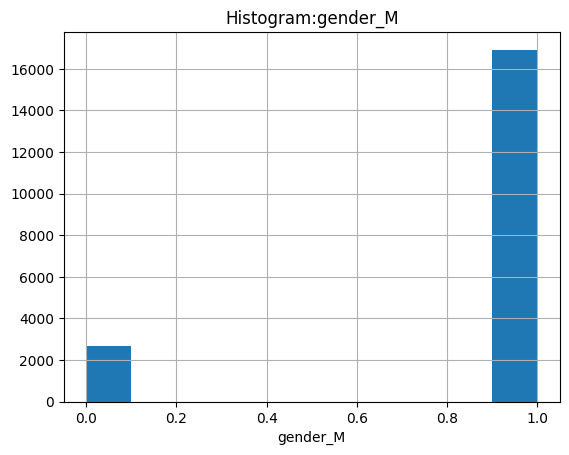

Axes(0.125,0.11;0.775x0.77)


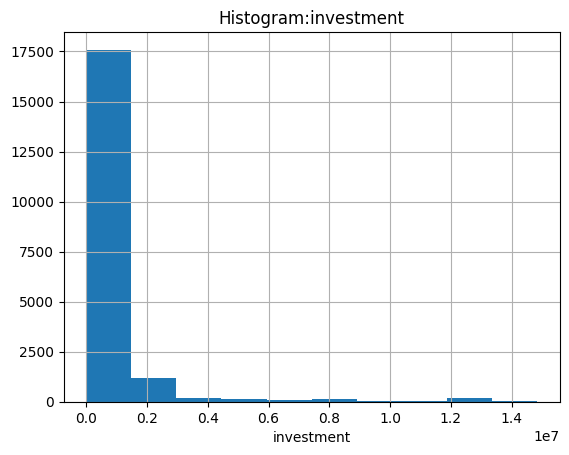

Axes(0.125,0.11;0.775x0.77)


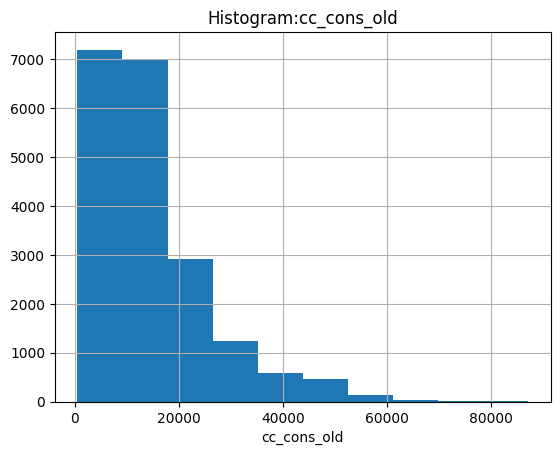

Axes(0.125,0.11;0.775x0.77)


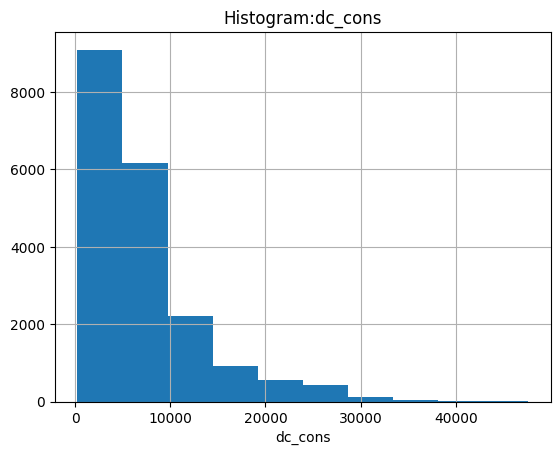

Axes(0.125,0.11;0.775x0.77)


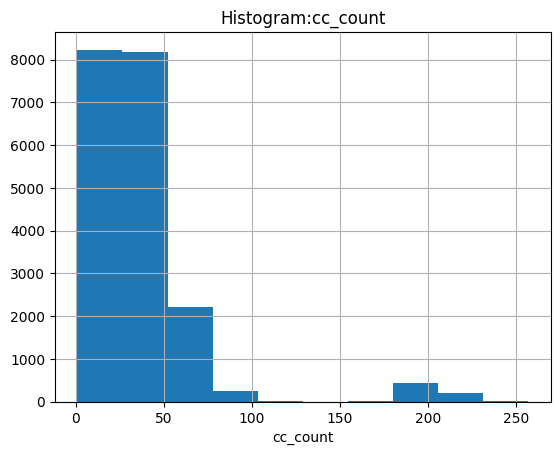

Axes(0.125,0.11;0.775x0.77)


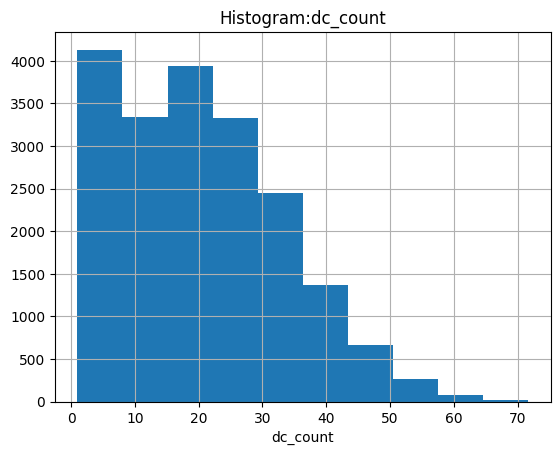

Axes(0.125,0.11;0.775x0.77)


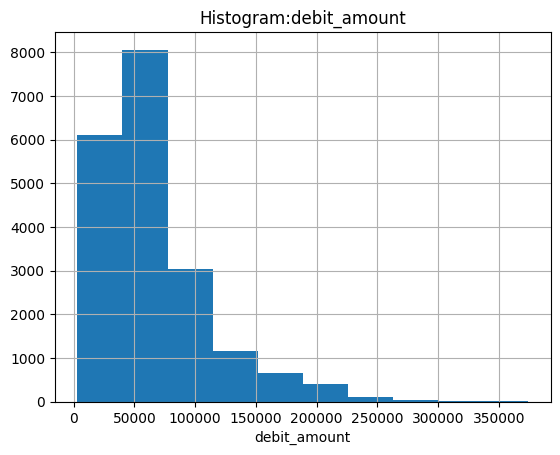

Axes(0.125,0.11;0.775x0.77)


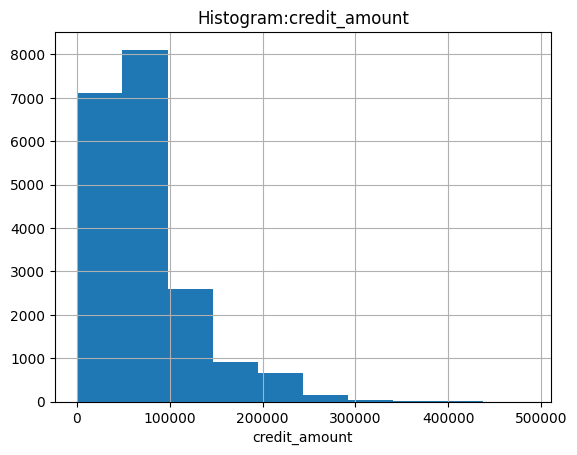

Axes(0.125,0.11;0.775x0.77)


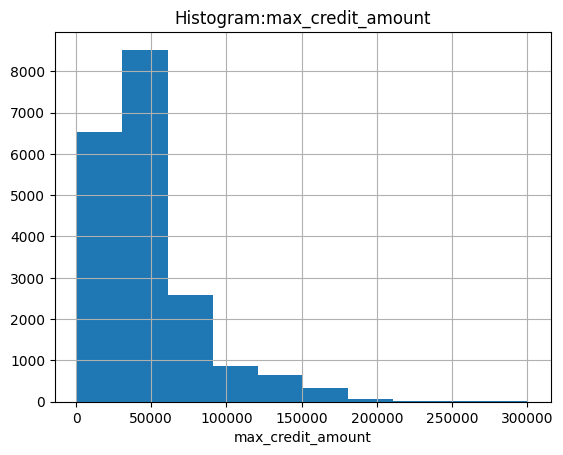

Axes(0.125,0.11;0.775x0.77)


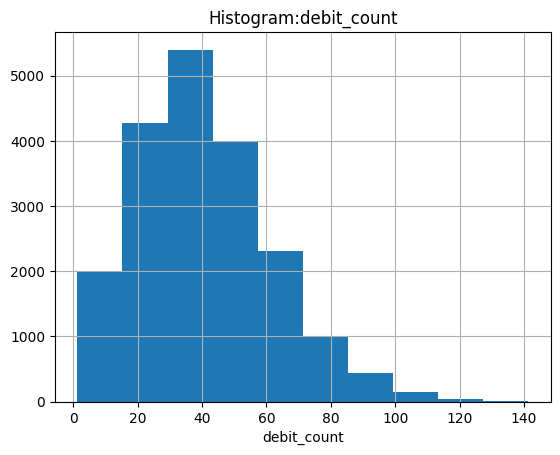

Axes(0.125,0.11;0.775x0.77)


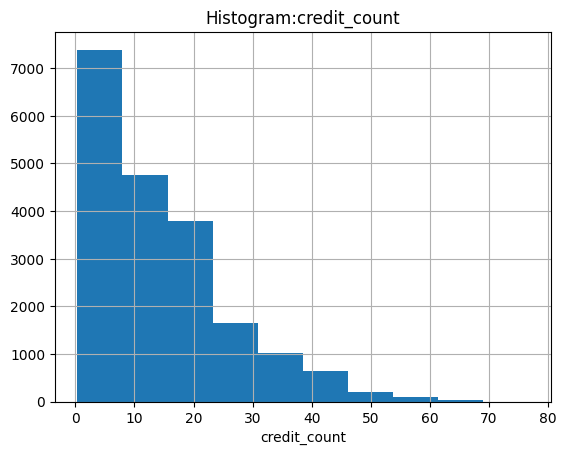

In [86]:
for col in data2.columns:
  print(data2[col].hist())
  plt.title(f'Histogram:{col}')
  plt.xlabel(col)
  plt.show()

Axes(0.125,0.11;0.775x0.77)


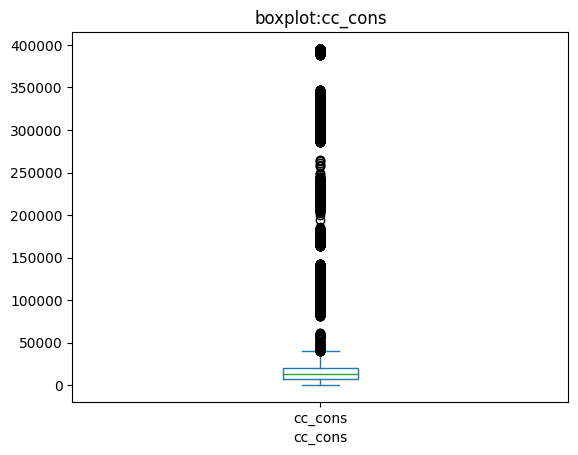

Axes(0.125,0.11;0.775x0.77)


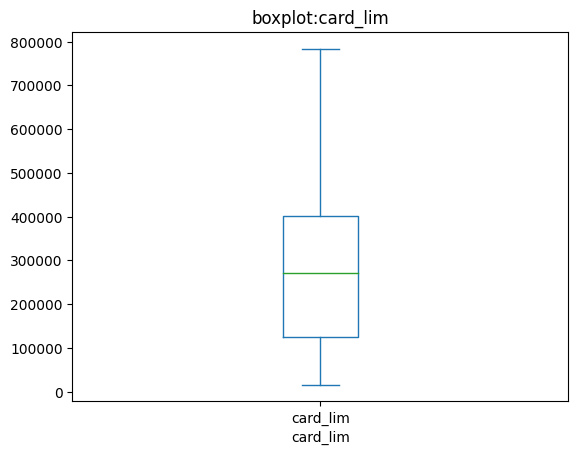

Axes(0.125,0.11;0.775x0.77)


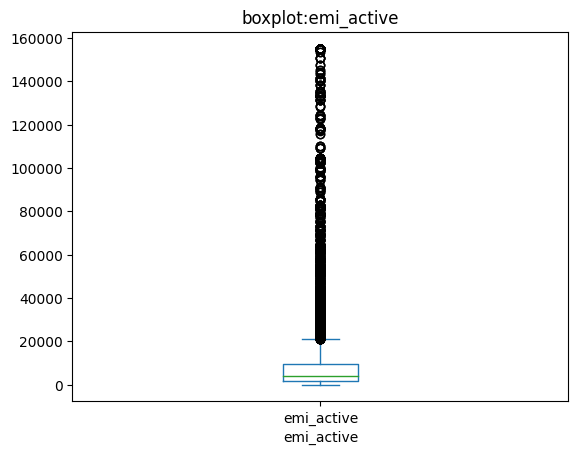

Axes(0.125,0.11;0.775x0.77)


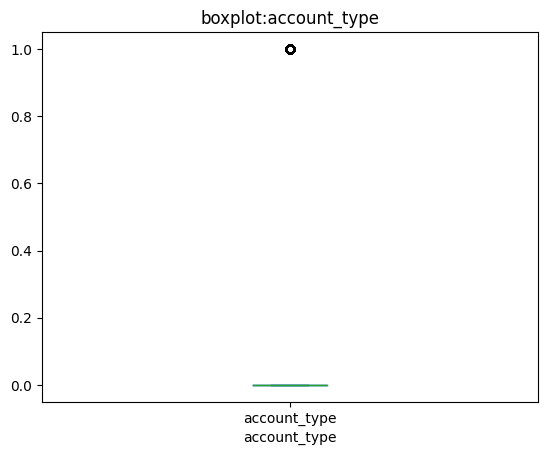

Axes(0.125,0.11;0.775x0.77)


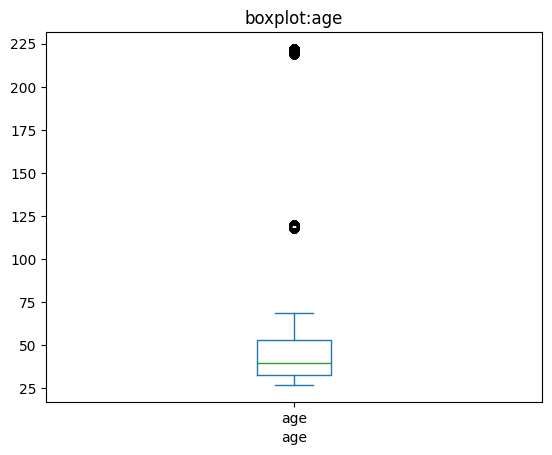

Axes(0.125,0.11;0.775x0.77)


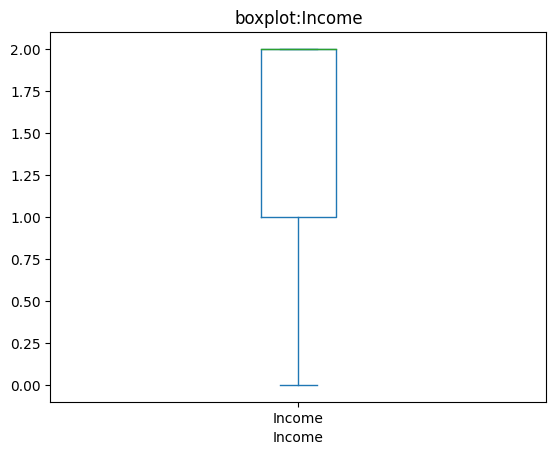

Axes(0.125,0.11;0.775x0.77)


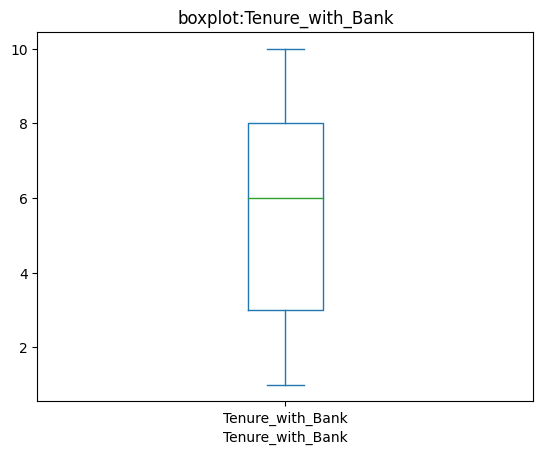

Axes(0.125,0.11;0.775x0.77)


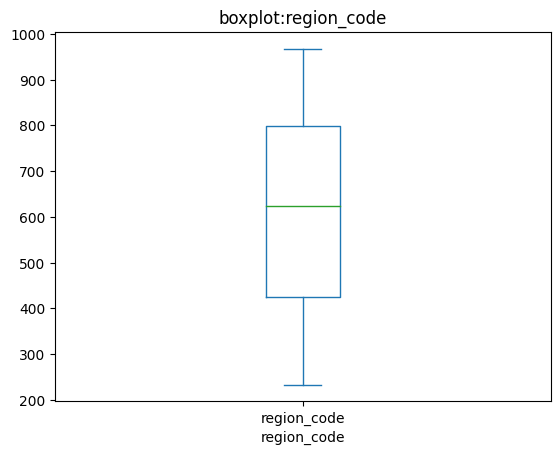

Axes(0.125,0.11;0.775x0.77)


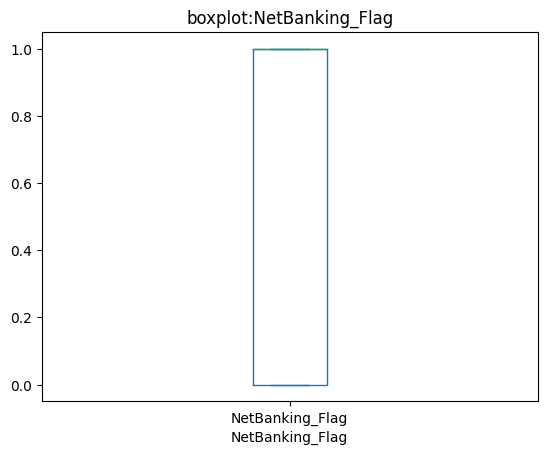

Axes(0.125,0.11;0.775x0.77)


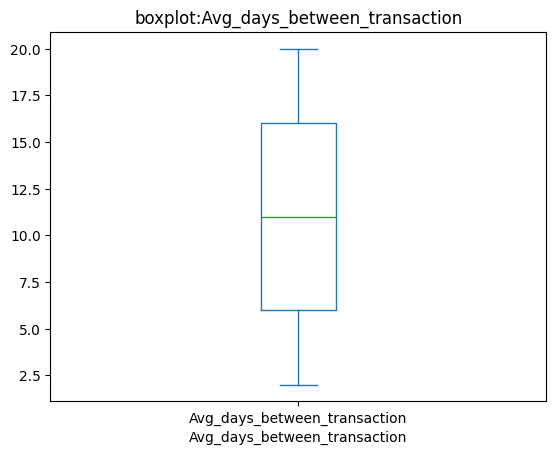

Axes(0.125,0.11;0.775x0.77)


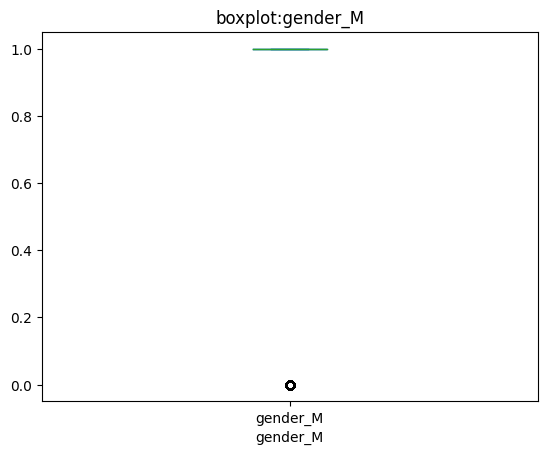

Axes(0.125,0.11;0.775x0.77)


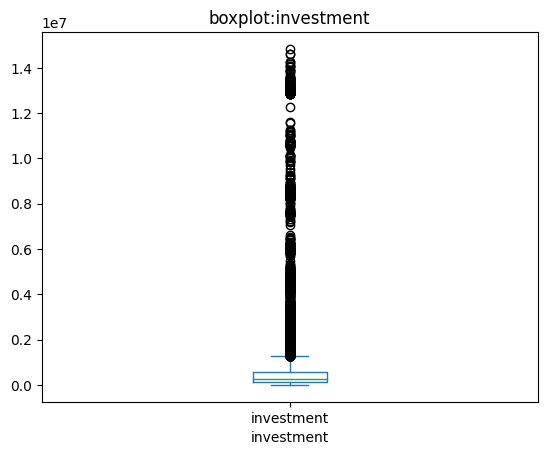

Axes(0.125,0.11;0.775x0.77)


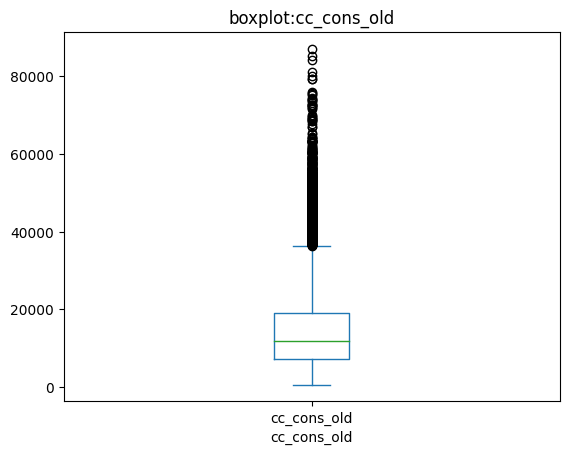

Axes(0.125,0.11;0.775x0.77)


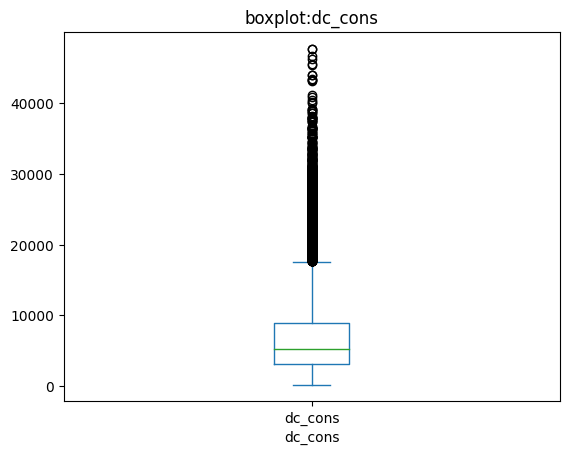

Axes(0.125,0.11;0.775x0.77)


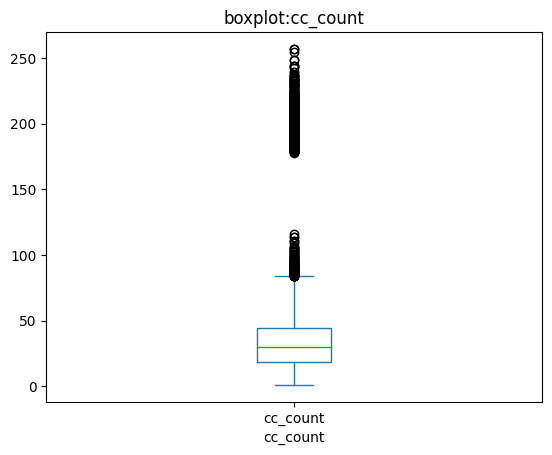

Axes(0.125,0.11;0.775x0.77)


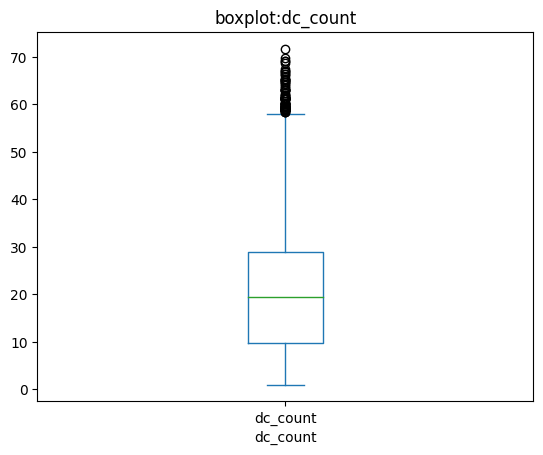

Axes(0.125,0.11;0.775x0.77)


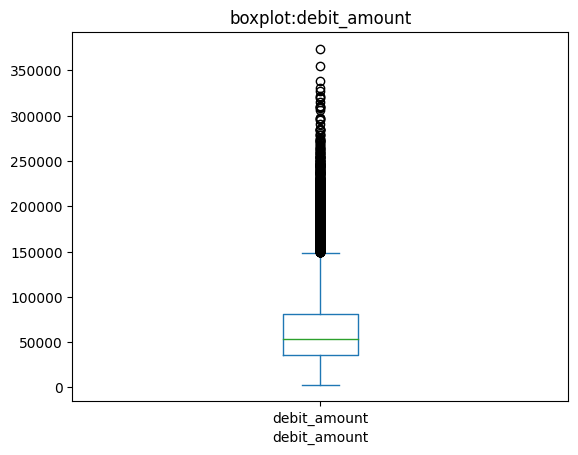

Axes(0.125,0.11;0.775x0.77)


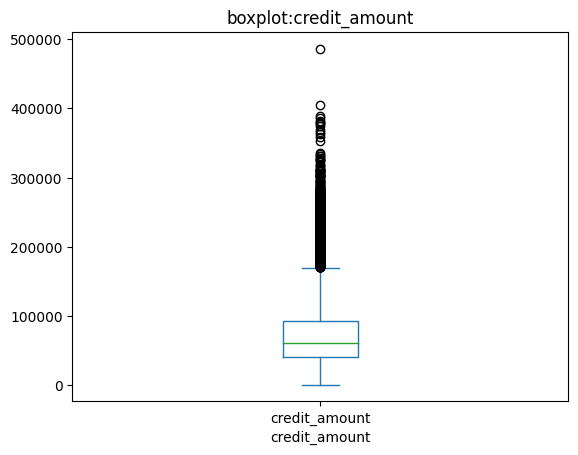

Axes(0.125,0.11;0.775x0.77)


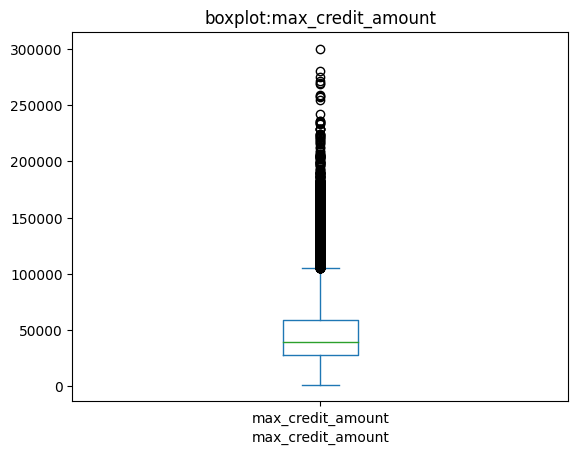

Axes(0.125,0.11;0.775x0.77)


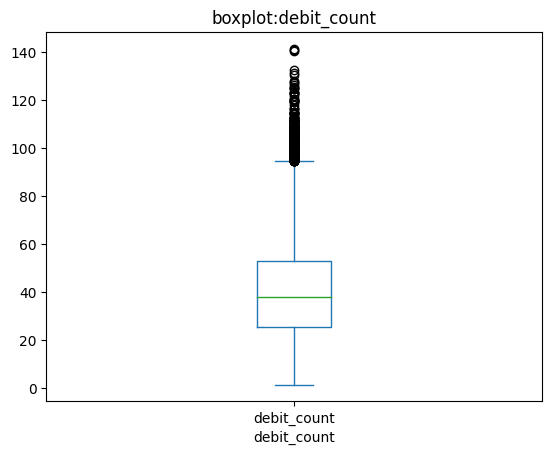

Axes(0.125,0.11;0.775x0.77)


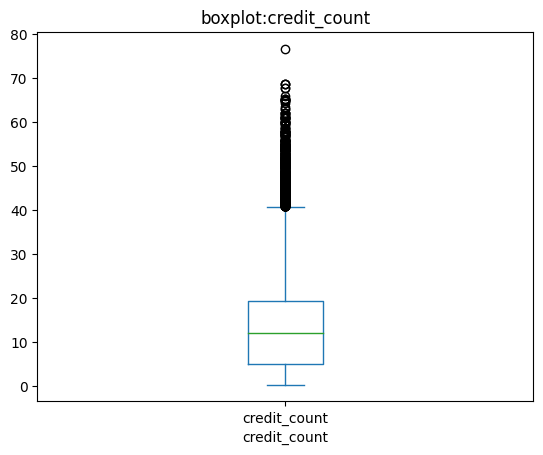

In [87]:
#outliers check using boxplot
for col in data2.columns:
  print(data2[col].plot(kind='box'))
  plt.title(f'boxplot:{col}')
  plt.xlabel(col)
  plt.show()

In [228]:
#from above box plot we can see that there are so many outliers

In [229]:
# removing outliers using iqr method
col_by_box=['cc_cons', 'emi_active',  'age', 'investment', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count']


In [89]:
# col_by_box contains the columns for which we want to treat outliers

# Function to treat outliers using IQR method
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the lower/upper bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Iterate through each column and treat outliers
for col in col_by_box:
    treat_outliers_iqr(data2, col)

Axes(0.125,0.11;0.775x0.77)


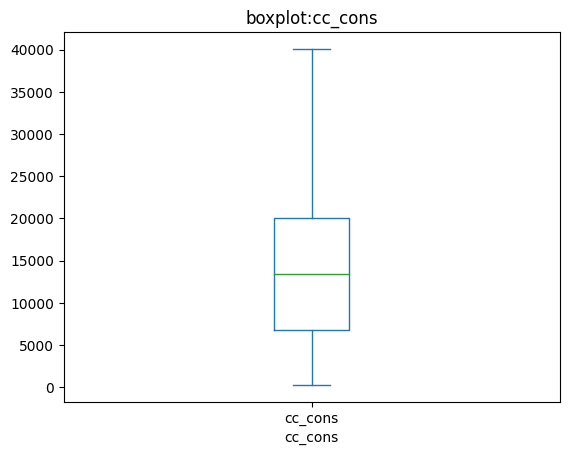

Axes(0.125,0.11;0.775x0.77)


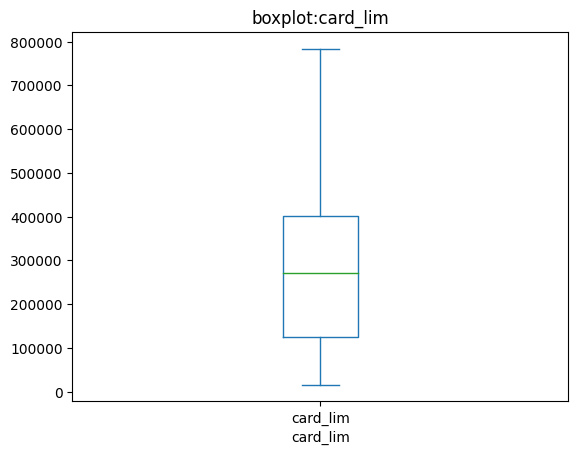

Axes(0.125,0.11;0.775x0.77)


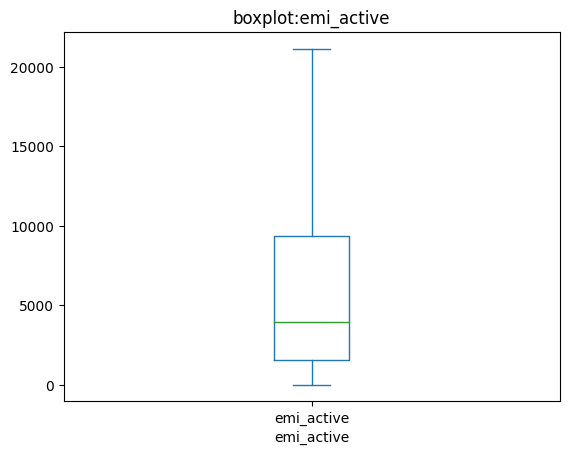

Axes(0.125,0.11;0.775x0.77)


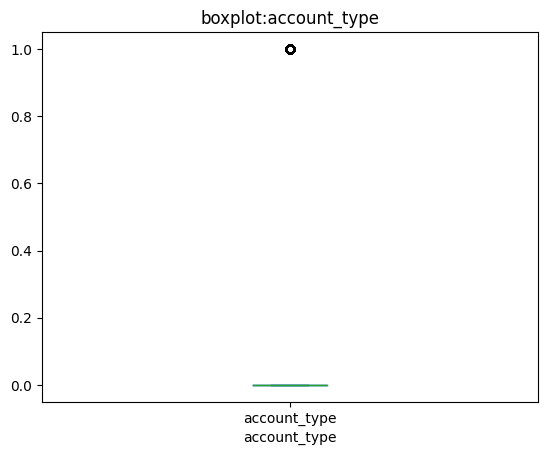

Axes(0.125,0.11;0.775x0.77)


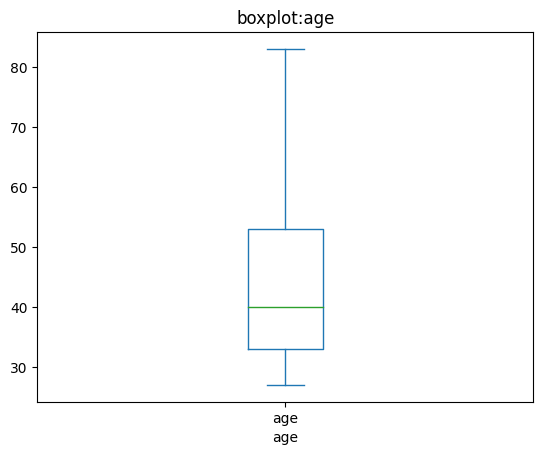

Axes(0.125,0.11;0.775x0.77)


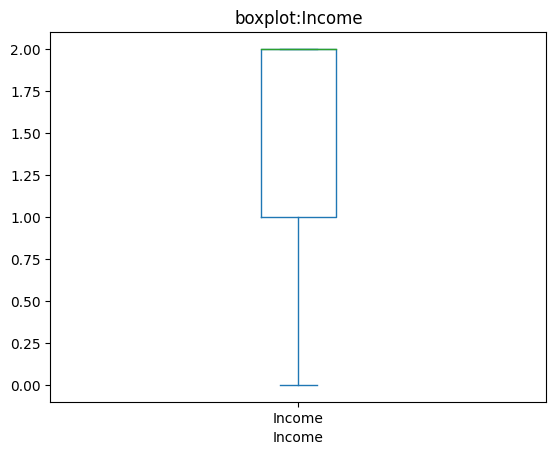

Axes(0.125,0.11;0.775x0.77)


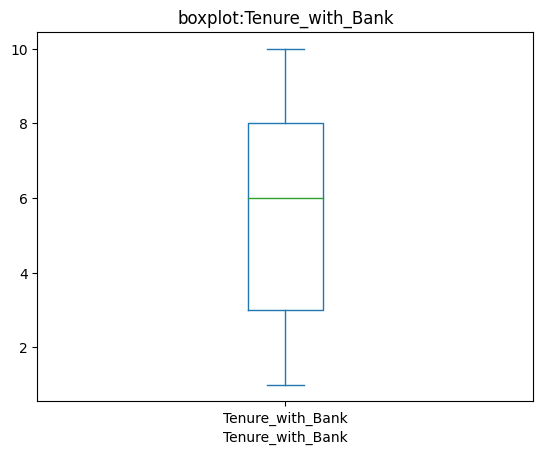

Axes(0.125,0.11;0.775x0.77)


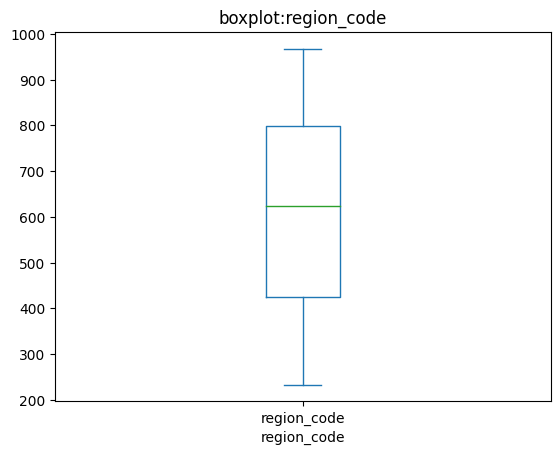

Axes(0.125,0.11;0.775x0.77)


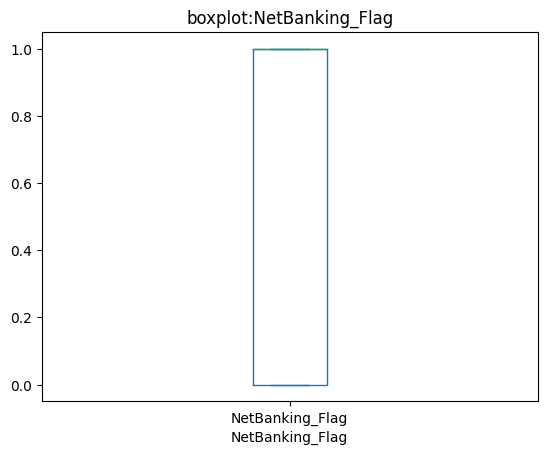

Axes(0.125,0.11;0.775x0.77)


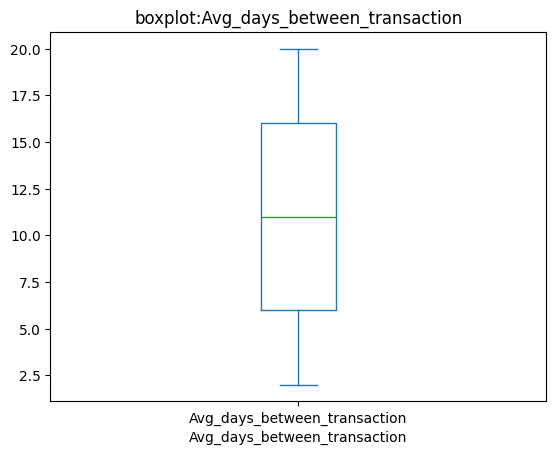

Axes(0.125,0.11;0.775x0.77)


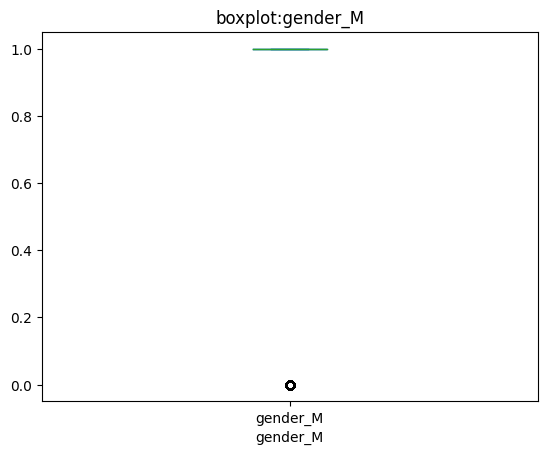

Axes(0.125,0.11;0.775x0.77)


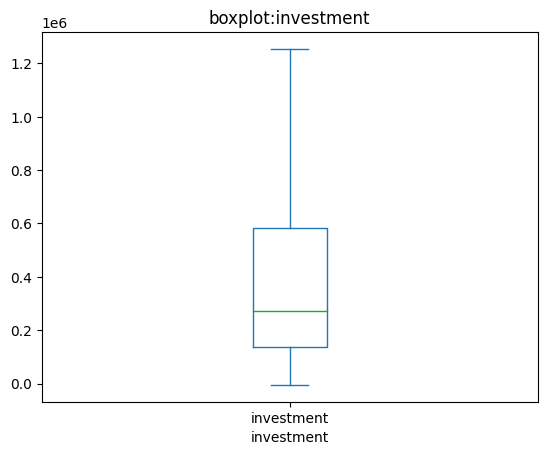

Axes(0.125,0.11;0.775x0.77)


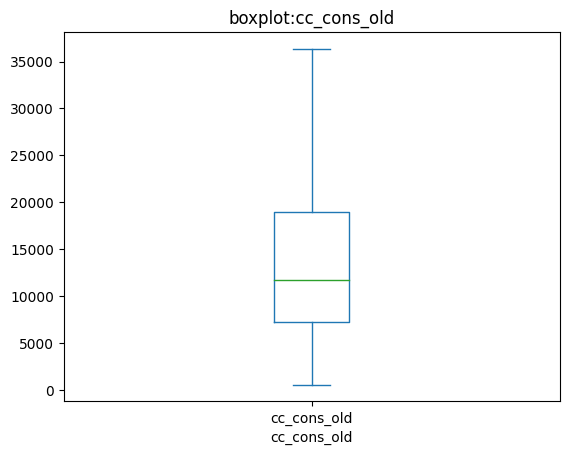

Axes(0.125,0.11;0.775x0.77)


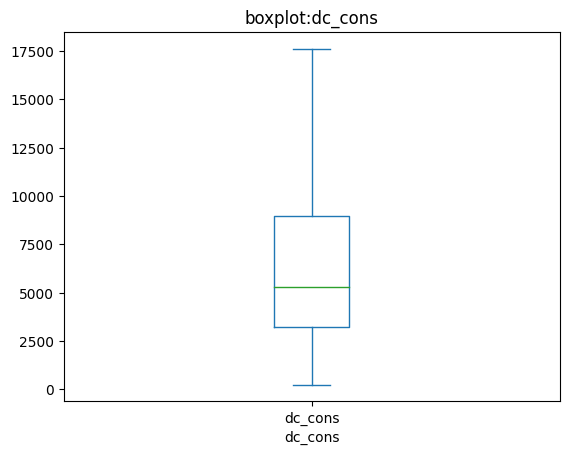

Axes(0.125,0.11;0.775x0.77)


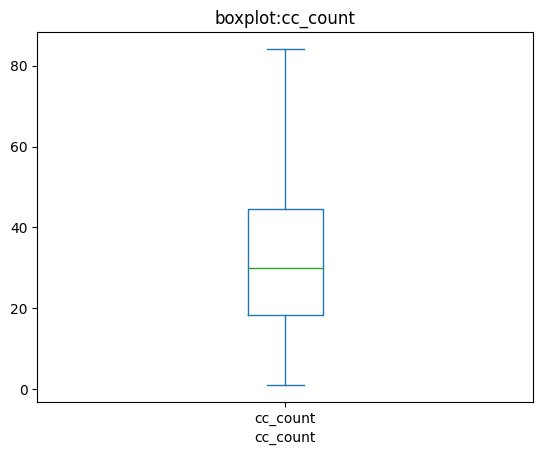

Axes(0.125,0.11;0.775x0.77)


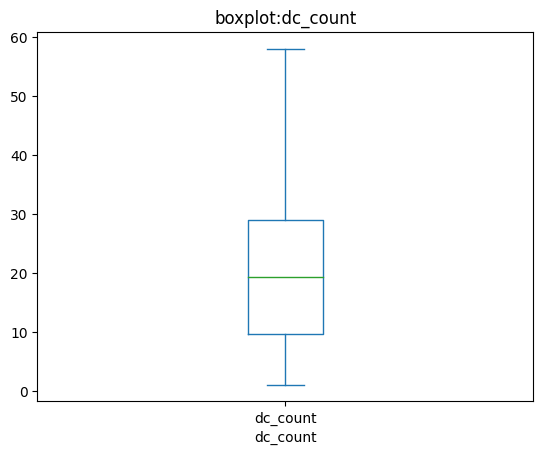

Axes(0.125,0.11;0.775x0.77)


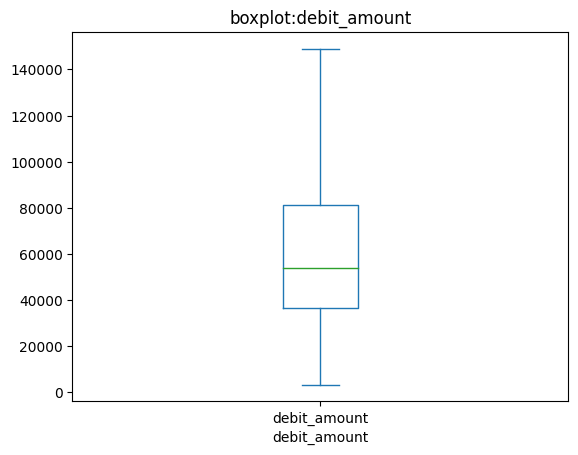

Axes(0.125,0.11;0.775x0.77)


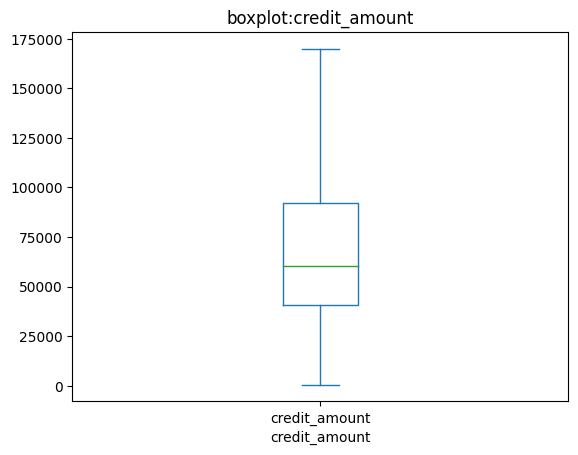

Axes(0.125,0.11;0.775x0.77)


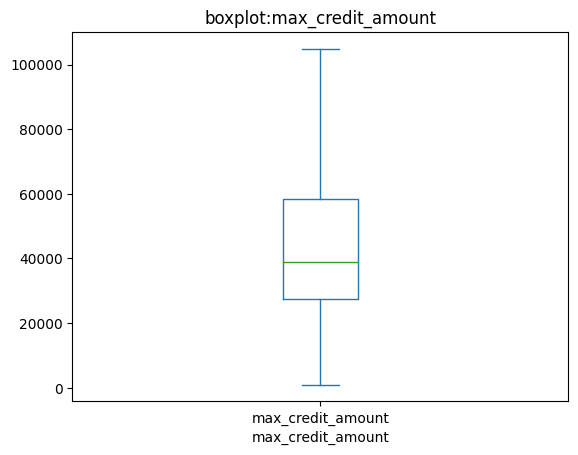

Axes(0.125,0.11;0.775x0.77)


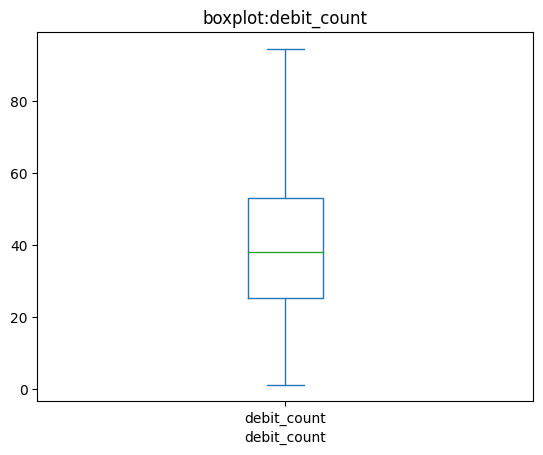

Axes(0.125,0.11;0.775x0.77)


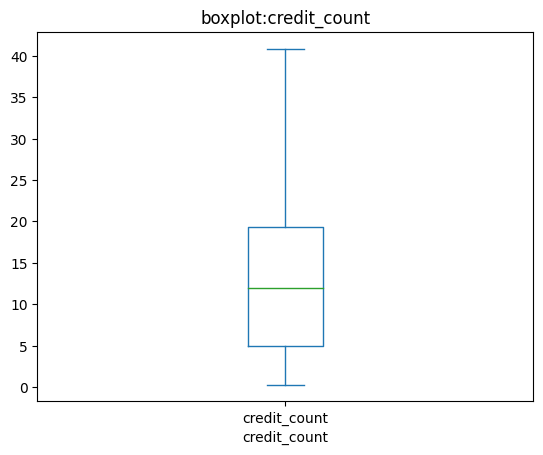

In [90]:
#checking again if we have outliers or not
for col in data2.columns:
  print(data2[col].plot(kind='box'))
  plt.title(f'boxplot:{col}')
  plt.xlabel(col)
  plt.show()

In [91]:
#from the above plot we can see that we have removed outliers

In [92]:
data2.skew()

cc_cons                         0.785939
card_lim                        0.372910
emi_active                      1.160117
account_type                    1.918703
age                             0.880509
Income                         -1.145240
Tenure_with_Bank                0.004315
region_code                    -0.096985
NetBanking_Flag                -0.966729
Avg_days_between_transaction   -0.008646
gender_M                       -2.122001
investment                      1.107961
cc_cons_old                     0.990358
dc_cons                         1.032520
cc_count                        0.799731
dc_count                        0.519552
debit_amount                    0.969454
credit_amount                   0.972039
max_credit_amount               1.010405
debit_count                     0.546765
credit_count                    0.959006
dtype: float64

Axes(0.125,0.11;0.775x0.77)


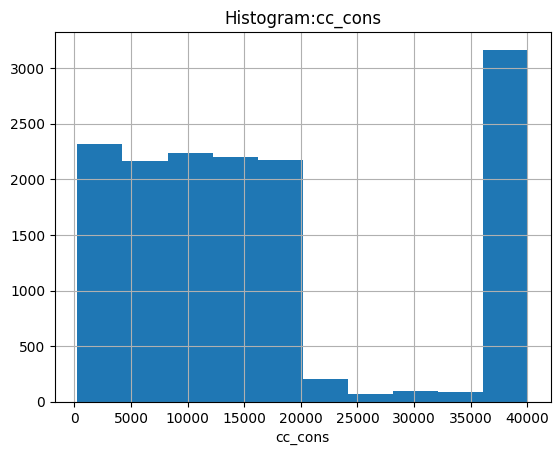

Axes(0.125,0.11;0.775x0.77)


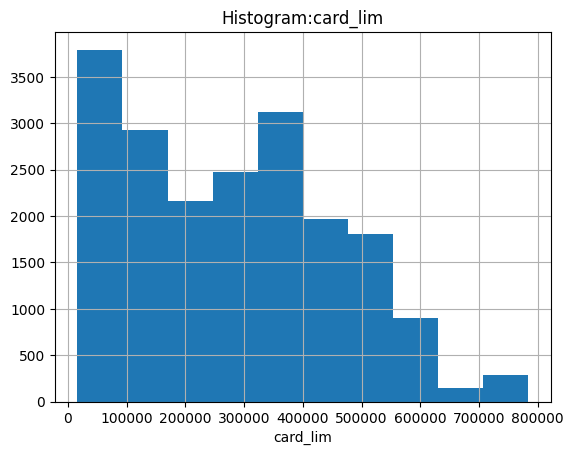

Axes(0.125,0.11;0.775x0.77)


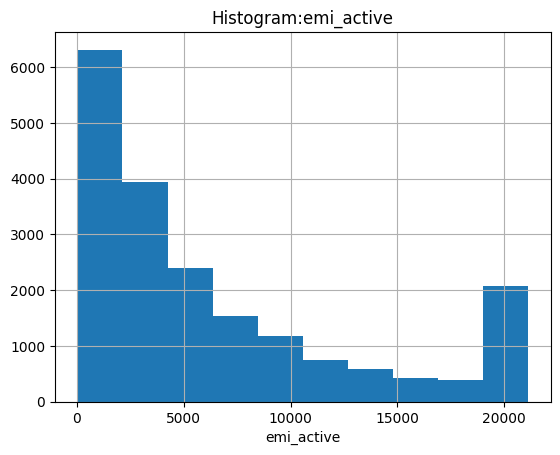

Axes(0.125,0.11;0.775x0.77)


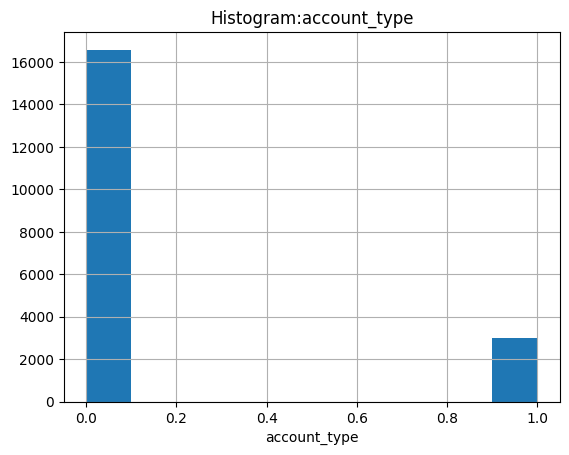

Axes(0.125,0.11;0.775x0.77)


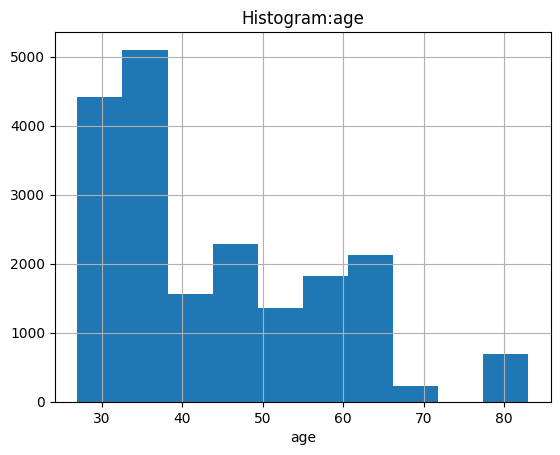

Axes(0.125,0.11;0.775x0.77)


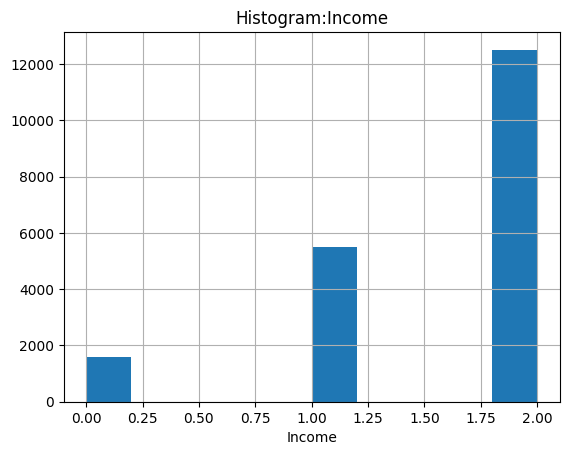

Axes(0.125,0.11;0.775x0.77)


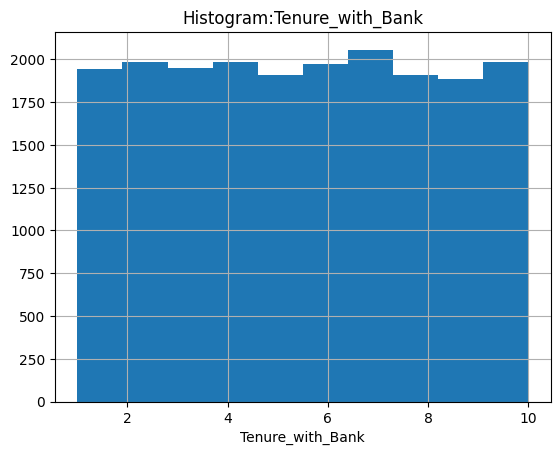

Axes(0.125,0.11;0.775x0.77)


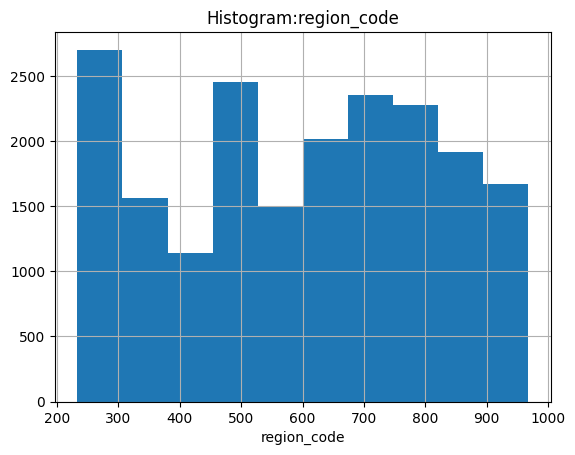

Axes(0.125,0.11;0.775x0.77)


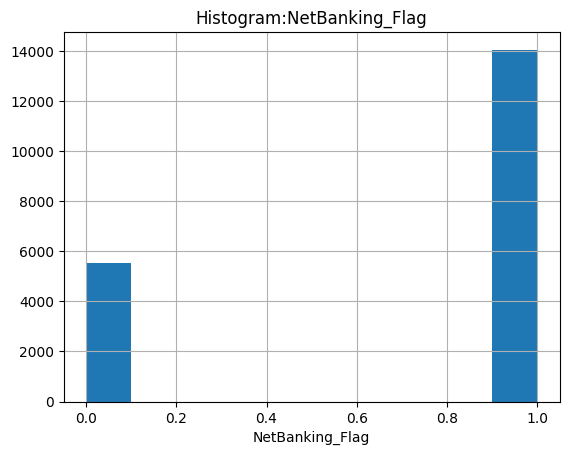

Axes(0.125,0.11;0.775x0.77)


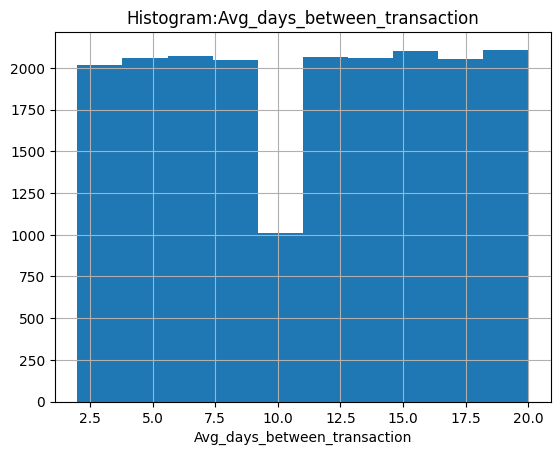

Axes(0.125,0.11;0.775x0.77)


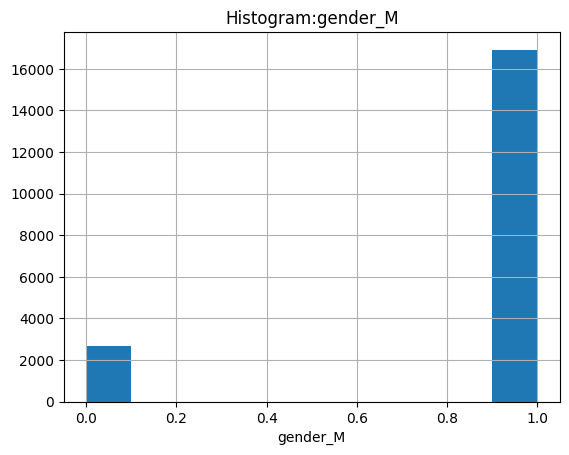

Axes(0.125,0.11;0.775x0.77)


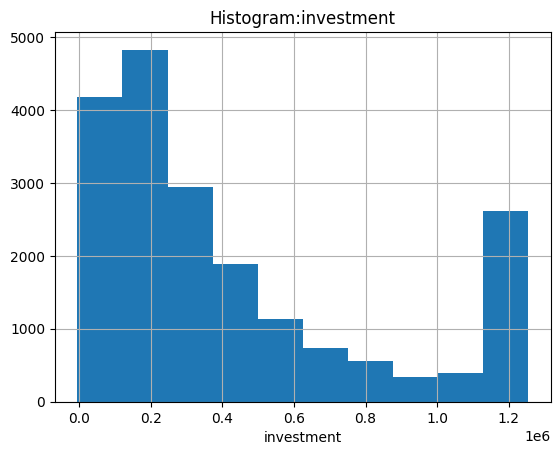

Axes(0.125,0.11;0.775x0.77)


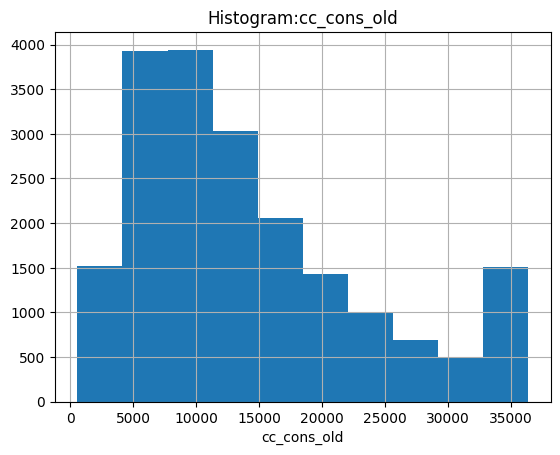

Axes(0.125,0.11;0.775x0.77)


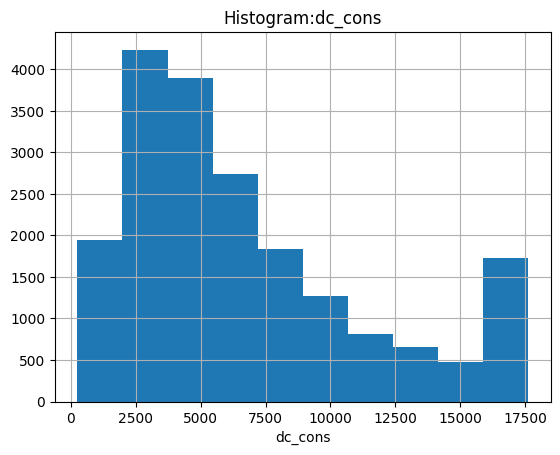

Axes(0.125,0.11;0.775x0.77)


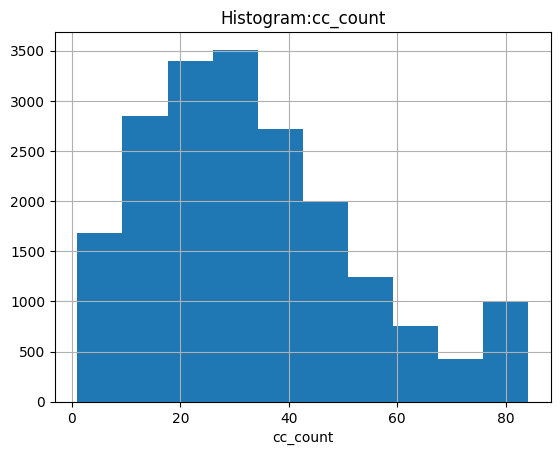

Axes(0.125,0.11;0.775x0.77)


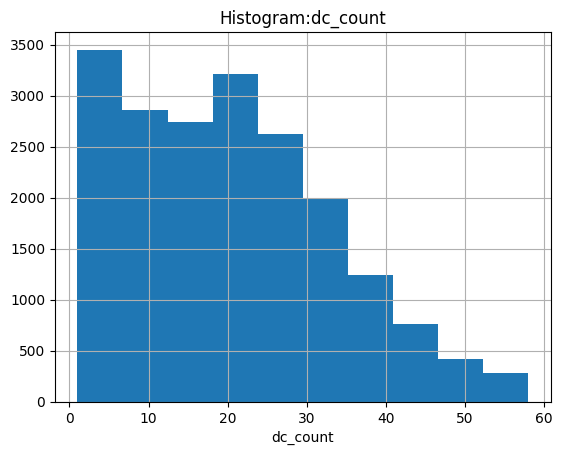

Axes(0.125,0.11;0.775x0.77)


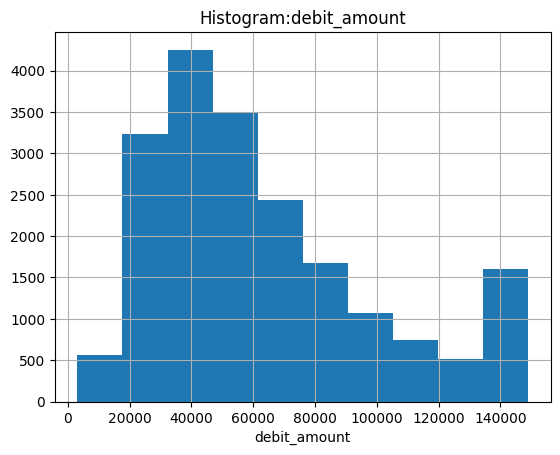

Axes(0.125,0.11;0.775x0.77)


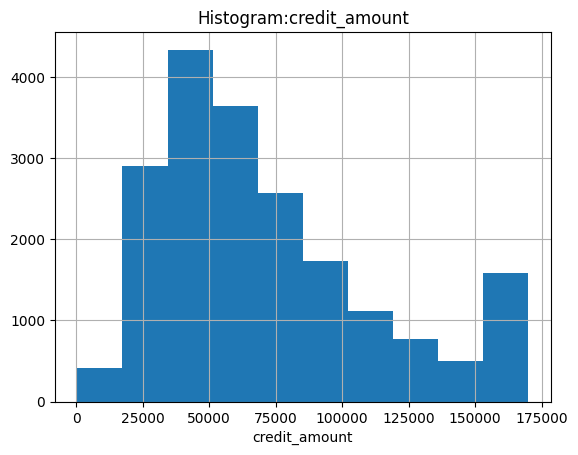

Axes(0.125,0.11;0.775x0.77)


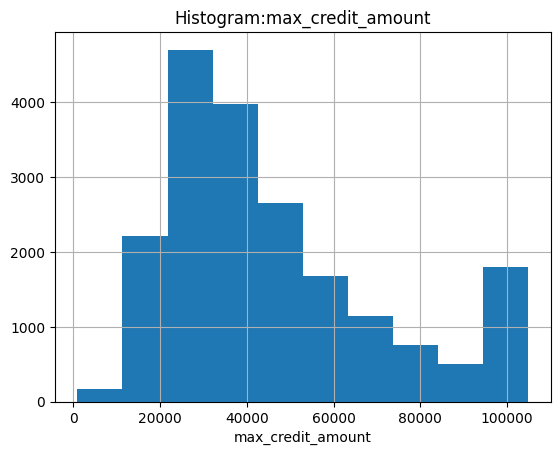

Axes(0.125,0.11;0.775x0.77)


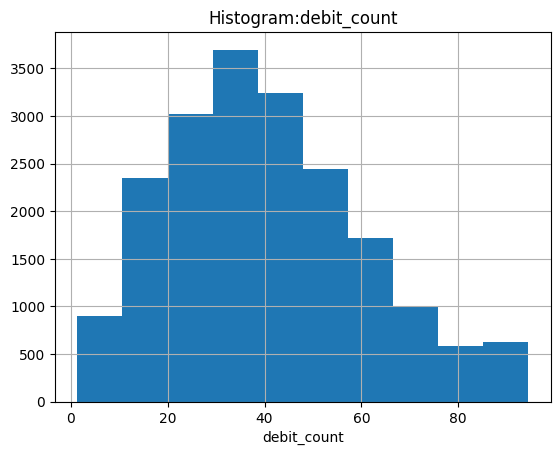

Axes(0.125,0.11;0.775x0.77)


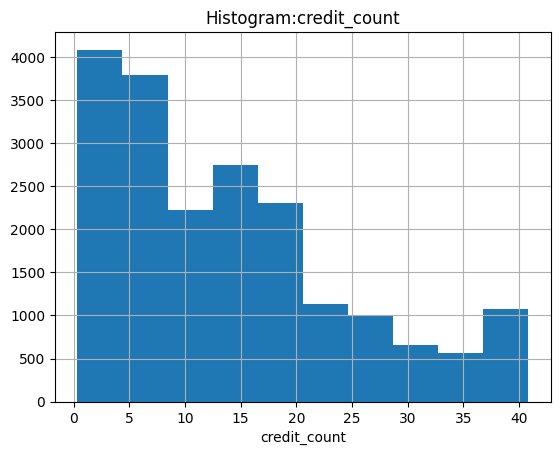

In [93]:
for col in data2.columns:
  print(data2[col].hist())
  plt.title(f'Histogram:{col}')
  plt.xlabel(col)
  plt.show()

In [94]:
#from the above graphs we can see that graphs are close to normal distribution

#MODEL BUILDING

In [95]:
df1 = data2[data2['cc_cons'].notnull()]

# Rows with missing values in 'cc_cons'
df2 = data2[data2['cc_cons'].isnull()]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X=df1[df1.columns.difference(['cc_cons'])]
y=df1.cc_cons

In [98]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=123 )

#Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

In [183]:
reg=LinearRegression()

In [184]:
reg.fit(train_X,train_y)

LinearRegression()

In [185]:
y_pred_test=reg.predict(test_X)

In [186]:
y_pred_train=reg.predict(train_X)

In [187]:
from math import sqrt
from numpy import mean

RMSPE formula is sqrt(mean(((train_y - y_pred_train) / train_y)**2))

In [190]:
train_lin=sqrt(mean(((train_y - y_pred_train) / train_y)**2))
train_lin

8.805845573622404

In [189]:
test_lin=sqrt(mean(((test_y - y_pred_test) / test_y)**2))
test_lin

8.508269118704302

#**KNN**

In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
param_grid={'n_neighbors':[3,4,5,6,7,8,],'weights':['distance','uniform']}

In [165]:
knn_grid=GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,scoring = 'neg_mean_squared_error',cv=5,verbose=True,n_jobs=-1)

In [167]:
knn_model=knn_grid.fit(train_X,train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [168]:
knn_model.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [169]:
knn_model=KNeighborsRegressor(n_neighbors=8,weights='uniform')

In [170]:
knn_model.fit(train_X,train_y)

KNeighborsRegressor(n_neighbors=8)

In [171]:
y_pred_train_kn=knn_model.predict(train_X)
y_pred_test_kn = knn_model.predict(test_X)

In [192]:
test_kn=sqrt(mean(((test_y - y_pred_test_kn) / test_y)**2))
test_kn

9.257682637512826

In [174]:
train_kn=sqrt(mean(((train_y - y_pred_train_kn) / train_y)**2))
train_kn

7.8735933235972455

#XGBOOST MODEL

In [119]:
from xgboost import XGBRFRegressor

In [120]:
xgb_model=XGBRFRegressor()

In [121]:
xgb_model = XGBRFRegressor(n_estimators=100, learning_rate=0.001, max_depth=6, n_jobs=-1)

In [122]:
xgb_model.fit(train_X,train_y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.001, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=-1,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [193]:
y_pred_test=xgb_model.predict(test_X)

In [194]:
y_pred_train=xgb_model.predict(train_X)

In [195]:
test_xg=sqrt(mean(((test_y - y_pred_test) / test_y)**2))
test_xg

8.498233737578083

In [196]:
train_xg=sqrt(mean(((train_y - y_pred_train) / train_y)**2))
train_xg

8.817115674164883

#Decision Tree

In [127]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#Model building
param_grid = {'max_depth': np.arange(2, 10),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3)
data_tree.fit(train_X,train_y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([4, 5, 6])})

In [128]:
dt=data_tree.best_estimator_

In [130]:
dt

DecisionTreeRegressor(max_depth=2, max_features=4)

In [197]:
data_tree=DecisionTreeRegressor(max_depth=2,max_features=4)
data_tree.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=2, max_features=4)

In [200]:
y_pred_test=data_tree.predict(test_X)
y_pred_train=data_tree.predict(train_X)

In [202]:
test_dt=sqrt(mean(((test_y - y_pred_test) / test_y)**2))
test_dt

8.495828742604756

In [204]:
train_dt=sqrt(mean(((train_y - y_pred_train) / train_y)**2))
train_dt

8.808864508335732

#**SVR**

In [134]:
from sklearn.svm import SVR


In [135]:
svr = SVR(kernel='rbf')  # 'rbf' is the radial basis function kernel, a common choice
svr.fit(train_X, train_y)


SVR()

In [205]:
y_pred_train=svr.predict(train_X)
y_pred_test = svr.predict(test_X)

In [206]:
test_sv=sqrt(mean(((test_y - y_pred_test) / test_y)**2))
test_sv

6.568359344823823

In [207]:
train_sv=sqrt(mean(((train_y - y_pred_train) / train_y)**2))
train_sv

6.817057541885355

# Random Forest

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [148]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'max_features': [4, 5, 6]  # Number of features to consider when looking for the best split
}


In [149]:
# Create a Random Forest Classifier
rf_reg = RandomForestRegressor()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3)

# Fit the model to the training data
grid_search.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [4, 5, 6],
                         'n_estimators': [100, 200, 300]})

In [150]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 5, 'n_estimators': 300}

In [152]:
rf_reg=RandomForestRegressor(n_estimators=300,max_features=5,max_depth=3)

In [153]:
rf_reg.fit(train_X,train_y)

RandomForestRegressor(max_depth=3, max_features=5, n_estimators=300)

In [208]:
y_pred_train_rf=rf_reg.predict(train_X)
y_pred_test_rf = rf_reg.predict(test_X)

In [209]:
test_rf=sqrt(mean(((test_y - y_pred_test_rf) / test_y)**2))
test_rf

8.476839963380092

In [210]:
train_rf=sqrt(mean(((train_y - y_pred_train_rf) / train_y)**2))
train_rf

8.784817764715934

In [220]:
import pandas as pd

da = {
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVR', 'XGBOOST'],
    'RMSPE_train': [train_lin, train_kn, train_dt, train_rf, train_sv, train_xg],
    'RMSPE_test': [test_lin, test_kn, test_dt, test_rf, test_sv, test_xg]
}

pd.DataFrame(da)



,Model,RMSPE_train,RMSPE_test
0,Linear Regression,8.805846,8.508269
1,KNN,9.257683,9.257683
2,Decision Tree,8.808865,8.495829
3,Random Forest,8.784818,8.476840
4,SVR,6.817058,6.568359
5,XGBOOST,8.817116,8.498234


From the above DataFrame we can clearly observe that SVR model doing well(getting lower RMSPE) compare to others
so we choose SVR model

Predicting missing values using SVR model

In [224]:
pred=df2[df2.columns.difference(['cc_cons'])]

In [ ]:
svr.predict(pred)